# Introduction
Test the class of KerasModel 

# Libraries

In [16]:
# Data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Model
from function import *
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

# Loading the data

In [17]:
df = pd.read_csv('data.csv', sep=';')
df.head(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout


# Preparing the data

In [18]:
print(f'Au début on a {df.shape[0]} lignes')
df_enrolled = df[df['Target'] == 'Enrolled']
print(f'Après avoir filtré les lignes avec Target=Enrolled, il reste {df_enrolled.shape[0]} lignes')
df = df[df['Target'] != 'Enrolled']
print(f'Après avoir filtré les lignes avec Target=Enrolled, il reste {df.shape[0]} lignes')

Au début on a 4424 lignes
Après avoir filtré les lignes avec Target=Enrolled, il reste 794 lignes
Après avoir filtré les lignes avec Target=Enrolled, il reste 3630 lignes


# Testing the model

## Preparing the data for the training

In [19]:
# Selecting the target
y = df['Target']
# Change it to binary
y = y.apply(lambda x: 1 if x == 'Graduate' else 0)

# Selecting the features
X = df.drop(columns=['Target'])

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## The Model

c:\Users\tanjo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5314 - loss: 77.9417
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6169 - loss: 2.9986
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5681 - loss: 7.9385
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6758 - loss: 2.2586
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6448 - loss: 3.2622
Epoch 6/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6004 - loss: 4.9712
Epoch 7/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7107 - loss: 1.9308
Epoch 8/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6646 - loss: 2.8351
Epoch 9/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6948 - loss: 2.0428
Epoch 10/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6915 - loss: 2.7592
Epoch 11/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7214 - loss: 2.2169
Epoch 12/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7317 - l

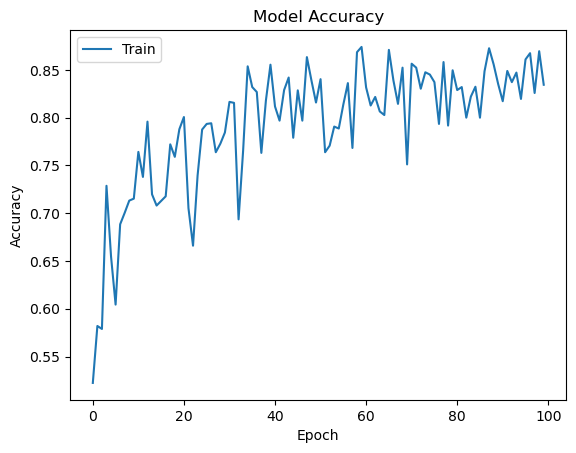

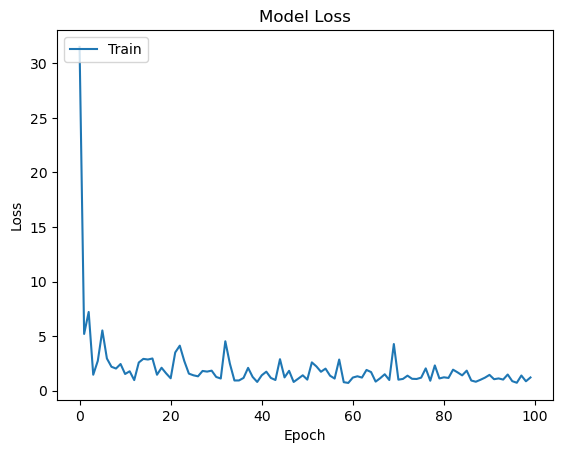

In [20]:
# Define the model
input_dim = X_train.shape[1]
layers = [(64, 'relu'), (32, 'relu'), (1, 'sigmoid')]
model = KerasModel(input_dim=input_dim, layers=layers)

# Train the model
model.train(X_train, y_train, epochs=100, batch_size=32)

# Predict
predictions = model.predict(X_test)
print(predictions)

# Plot accuracy and loss
model.plot_accuracy()
model.plot_loss()